<a href="https://colab.research.google.com/github/ertgrulyksk/Fetal-Health-Classification-by-means-of-CTG-data/blob/main/Fetal_Health_Classification_by_means_of_CTG_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
! pip install pydotplus
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import warnings

def _warn(*argv, **kwargs):
    pass

warnings.warn = _warn

import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_path = "fetal_health.csv"
df = pd.read_csv(data_path)

# Remove spaces in columns names for accessing by properties
df.columns = [c.replace(" ", "_") for c in df.columns]
df = df.rename(columns={
    "percentage_of_time_with_abnormal_long_term_variability": \
        "abnormal_long_term_variability_time(%)"
})

df.head(4).T

,0,1,2,3
baseline_value,120.0,132.000,133.000,134.000
accelerations,0.0,0.006,0.003,0.003
fetal_movement,0.0,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003
severe_decelerations,0.0,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400
abnormal_long_term_variability_time(%),43.0,0.000,0.000,0.000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   baseline_value                          2126 non-null   float64
 1   accelerations                           2126 non-null   float64
 2   fetal_movement                          2126 non-null   float64
 3   uterine_contractions                    2126 non-null   float64
 4   light_decelerations                     2126 non-null   float64
 5   severe_decelerations                    2126 non-null   float64
 6   prolongued_decelerations                2126 non-null   float64
 7   abnormal_short_term_variability         2126 non-null   float64
 8   mean_value_of_short_term_variability    2126 non-null   float64
 9   abnormal_long_term_variability_time(%)  2126 non-null   float64
 10  mean_value_of_long_term_variability     2126 non-null   floa

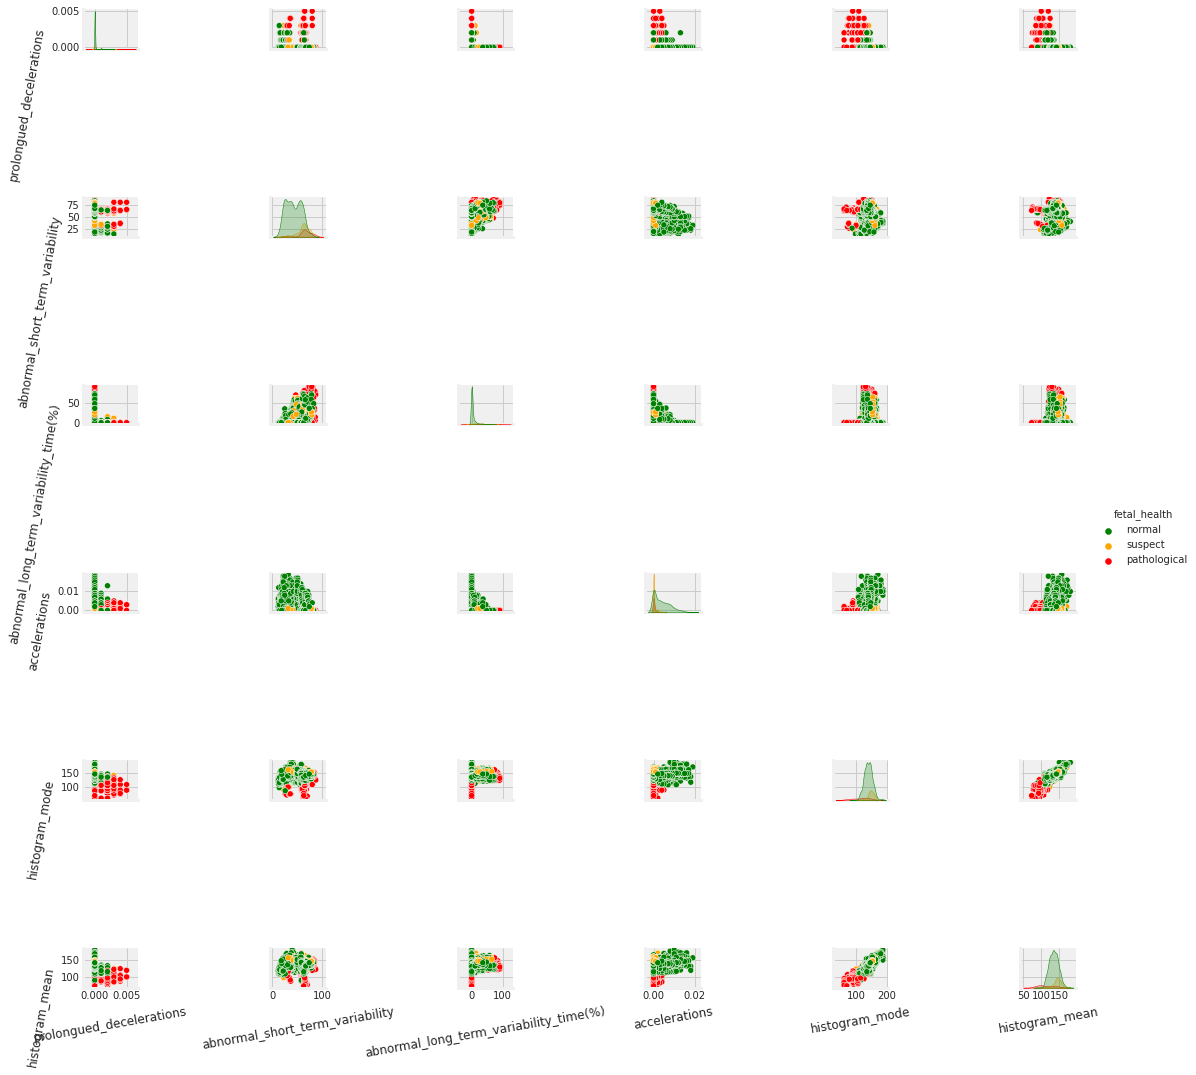

In [21]:
num_to_fetal_state = {1: "normal", 2: "suspect", 3: "pathological"}
num_classes = len(num_to_fetal_state)

df_corr = df.corr().fetal_health[:-1]
indices = df_corr.abs().sort_values(ascending=False).index[:6]
indices = indices.append(pd.Index(["fetal_health"]))

df.fetal_health.astype(object, copy=False)
df.fetal_health.replace(num_to_fetal_state, inplace=True)

g = sns.pairplot(
    df[indices],
    hue="fetal_health",
    hue_order=num_to_fetal_state.values(),
    palette=["green", "orange", "red"]
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 10)
    ax.set_ylabel(ax.get_ylabel(), rotation = 80)
    ax.yaxis.get_label().set_horizontalalignment('right')

In [22]:
df_corr = df.corr()
for i in range(len(df_corr)):
    df_corr.iloc[i, i] = 0.0
    
corr_idx = df_corr.abs().idxmax()
correlations = []
for index, column in zip(corr_idx.index, corr_idx):
    correlations += [df_corr[index][column]]
    
df_corr = pd.DataFrame(corr_idx)
df_corr.columns = ["Most correlated feature"]
df_corr["correlation"] = correlations
df_corr.iloc[df_corr["correlation"].abs().argsort()[::-1]]

,Most correlated feature,correlation
histogram_median,histogram_mean,0.948251
histogram_mean,histogram_median,0.948251
histogram_mode,histogram_median,0.933399
histogram_min,histogram_width,-0.898519
histogram_width,histogram_min,-0.898519
baseline_value,histogram_median,0.789246
histogram_number_of_peaks,histogram_width,0.747071
histogram_max,histogram_width,0.690769
mean_value_of_short_term_variability,histogram_width,0.660847
histogram_variance,histogram_width,0.615884


In [23]:
df.fetal_health.value_counts()

normal          1655
suspect          295
pathological     176
Name: fetal_health, dtype: int64

In [24]:
df = pd.get_dummies(df, "fetal_health")
df = df.astype(float)
df.iloc[:, -num_classes:].head()

df_corr = (
    df.corr().iloc[:-num_classes, -num_classes:]
        .sort_values("fetal_health_normal")
)
df_corr

,fetal_health_normal,fetal_health_pathological,fetal_health_suspect
abnormal_short_term_variability,-0.493391,0.306735,0.348213
abnormal_long_term_variability_time(%),-0.489400,0.212343,0.418659
prolongued_decelerations,-0.340554,0.567540,-0.043281
baseline_value,-0.251875,-0.049357,0.341922
histogram_min,-0.158171,-0.097555,0.267773
severe_decelerations,-0.087967,0.161516,-0.023070
histogram_variance,-0.085948,0.331060,-0.160642
fetal_movement,-0.060974,0.104288,-0.009881
histogram_number_of_zeroes,0.031163,0.009780,-0.045231
light_decelerations,0.032889,0.180793,-0.183622


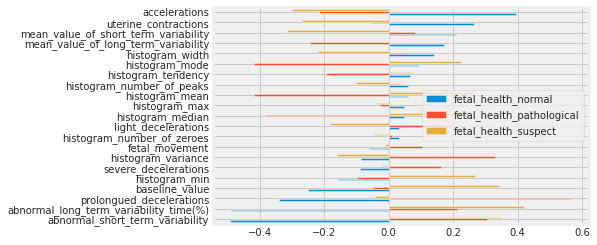

In [25]:
df_corr.plot(kind="barh")

In [26]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)

df_pf = pd.DataFrame(pf.fit_transform(df.iloc[:, :-num_classes]))
df_pf.columns = pf.get_feature_names(df.iloc[:, :-num_classes].columns)
df_pf.columns = [column.replace(" ", " * ") for column in df_pf.columns]

df_pf = pd.concat([df_pf, df.iloc[:, -num_classes:]], axis=1)

for feature in num_to_fetal_state.values():
    df_pf_corr = df_pf.corr()["fetal_health_" + feature][:-num_classes]
    index = df_pf_corr.abs().sort_values(ascending=False).index

    print(feature.upper())
    print(df_pf_corr[index].head(3))
    print()

NORMAL
abnormal_short_term_variability^2                                          -0.526790
abnormal_short_term_variability * abnormal_long_term_variability_time(%)   -0.520132
baseline_value * abnormal_short_term_variability                           -0.514252
Name: fetal_health_normal, dtype: float64

SUSPECT
abnormal_long_term_variability_time(%) * mean_value_of_long_term_variability    0.509675
abnormal_long_term_variability_time(%) * histogram_max                          0.443382
abnormal_long_term_variability_time(%) * histogram_mode                         0.436469
Name: fetal_health_suspect, dtype: float64

PATHOLOGICAL
prolongued_decelerations * abnormal_short_term_variability    0.592449
prolongued_decelerations * histogram_max                      0.568461
prolongued_decelerations                                      0.567540
Name: fetal_health_pathological, dtype: float64



In [27]:
from sklearn.model_selection import train_test_split

df = pd.read_csv(data_path)
df.columns = [c.replace(" ", "_") for c in df.columns]

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

seed = 123
split = train_test_split(X, y, test_size = 0.2, random_state=seed, stratify=y)
X_train, X_test, y_train, y_test = split

In [28]:
from sklearn.pipeline import Pipeline

from typing import Dict, List, Tuple, Any

import inspect 

def create_pipeline(
    pipeline_classes: List[Tuple[object, Dict[str, Any]]],
    **kwargs
) -> Tuple[Pipeline, Dict[str, Any]]:
    """Creates a pipeline with its parameters using a list of tuples
    containing the class and its parameters.

    Args:
        pipeline_classes (List[Tuple[object, Dict[str, Any]]]): 
            List of tuples containing the class and its parameters

    Returns:
        Tuple[Pipeline, Dict[str, Any]]: Pipeline, parameters
    """
    
    pipeline = []
    params = {}
    
    for cls, cls_params in pipeline_classes:
        name = cls.__name__ if cls.__name__ else type(cls).__name__
        if inspect.isclass(cls):
            sig = inspect.signature(cls)
            valid_kwargs = {
                k: v for k, v in kwargs.items() if k in sig.parameters
            }
            instance = cls(**valid_kwargs)
        else:
            instance = cls
            
        pipeline.append((name, instance))
        params.update({f"{name}__{k}" : v for k, v in cls_params.items()})
    
    estimator = Pipeline(pipeline)
    
    return estimator, params

In [29]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from pprint import pprint

results = {}

logistic_regression = LogisticRegression(max_iter = 10e4, random_state=seed)
logistic_regression = OneVsRestClassifier(logistic_regression)
logistic_regression.__name__ = "OneVsRest[LogisticRegression]"

preprocess_config = [
    (PolynomialFeatures, {"degree": [1, 2]}),
    (MinMaxScaler, {})
]

model_configs = [
    (
        logistic_regression, {}
    ),
    (
        DecisionTreeClassifier,
        {
            'splitter': ['best', 'random'],
            'max_depth': [4, 8, 12, None]
        }
    ),
    (
        RandomForestClassifier,
        {
            'n_estimators': [10, 100, 200, 300],
            'max_depth': [4, 8, 12, None]
        }
    ),
    (
        SVC,
        {
            'C': [1, 10, 100, 500],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [1, 2, 3]
        }
    ),
    (
        KNeighborsClassifier,
        {
            'n_neighbors': [1, 3, 5, 7, 10],
            'weights': ['uniform', 'distance']
        }
    )
]

In [30]:
for model_config in model_configs:    
    estimator, params = create_pipeline(
        preprocess_config + [model_config],
        random_state = seed
    )
    
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    grid = GridSearchCV(
        estimator,
        params,
        cv=kf,
        scoring=make_scorer(f1_score, average="macro"),
        n_jobs=4,
        return_train_score=True
    )
        
    result = grid.fit(X_train, y_train)
    
    name = model_config[0].__name__
    print(name)
    print("="*len(name))
    print("Params:")
    pprint(result.best_params_)
    print(f"Mean validation F1 Score: {result.best_score_}")
    print()
    
    results[name] = result

OneVsRest[LogisticRegression]
Params:
{'PolynomialFeatures__degree': 2}
Mean validation F1 Score: 0.8096085177189479

DecisionTreeClassifier
Params:
{'DecisionTreeClassifier__max_depth': 8,
 'DecisionTreeClassifier__splitter': 'best',
 'PolynomialFeatures__degree': 2}
Mean validation F1 Score: 0.8765716498659717

RandomForestClassifier
Params:
{'PolynomialFeatures__degree': 1,
 'RandomForestClassifier__max_depth': None,
 'RandomForestClassifier__n_estimators': 300}
Mean validation F1 Score: 0.8990261280829838

SVC
===
Params:
{'PolynomialFeatures__degree': 1,
 'SVC__C': 100,
 'SVC__degree': 1,
 'SVC__kernel': 'rbf'}
Mean validation F1 Score: 0.8699708074723252

KNeighborsClassifier
Params:
{'KNeighborsClassifier__n_neighbors': 5,
 'KNeighborsClassifier__weights': 'distance',
 'PolynomialFeatures__degree': 1}
Mean validation F1 Score: 0.8358563741447774



In [31]:
from sklearn.metrics import (
    precision_recall_fscore_support,
    accuracy_score
)

def evaluate_metrics(y_true, y_pred):
    results_pos = dict()
    results_pos['accuracy'] = accuracy_score(y_true, y_pred)
    precision, recall, f_beta, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro'
    )
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1_score'] = f_beta
    
    return results_pos

In [32]:
tests_metrics = {}
for model_name, result in results.items():
    y_pred = result.best_estimator_.predict(X_test)
    tests_metrics[model_name] = evaluate_metrics(y_test, y_pred)
    
results_df = pd.DataFrame.from_dict(tests_metrics).T
display(results_df)

,accuracy,recall,precision,f1_score
OneVsRest[LogisticRegression],0.884977,0.733195,0.836651,0.775159
DecisionTreeClassifier,0.924883,0.864878,0.857906,0.861336
RandomForestClassifier,0.948357,0.892730,0.912056,0.902129
SVC,0.922535,0.845292,0.877924,0.860832
KNeighborsClassifier,0.915493,0.793492,0.898257,0.838374


In [33]:
from sklearn.tree import export_graphviz
import pydotplus
import cv2

colors = {
    'normal': 'limegreen',
    'suspect': 'orange',
    'pathological': 'orangered3'
}

def remove_substring(string, index, length):
    return string[:index] + string[index+length:]

def create_tree_image(cls):
    # Create dot graph
    dot_data = export_graphviz(
        cls,
        feature_names = X.columns,
        class_names = list(num_to_fetal_state.values()),
        impurity = False,
        filled = True,
        rounded = True,
    )

    # Remove previous colors from the graph
    while True:
        fillcolor_pos = dot_data.find(', fillcolor=')
        if fillcolor_pos != -1:
            dot_data = remove_substring(dot_data, fillcolor_pos, 21)
        else:
            break
    
    # Add new colors
    for class_name, color in colors.items():
        dot_data = dot_data.replace(f'= {class_name}"', f'= {class_name}", fillcolor="{color}"')
        
    # Create PNG image
    graph = pydotplus.graph_from_dot_data(dot_data)
    image = graph.create_png()
    with open('tree.png', 'wb') as f:
        f.write(image)

    # Read the generated image
    image = cv2.imread('tree.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

{'accuracy': 0.9061032863849765,
 'f1_score': 0.8312008978675646,
 'precision': 0.8599889796400659,
 'recall': 0.8065151647753241}


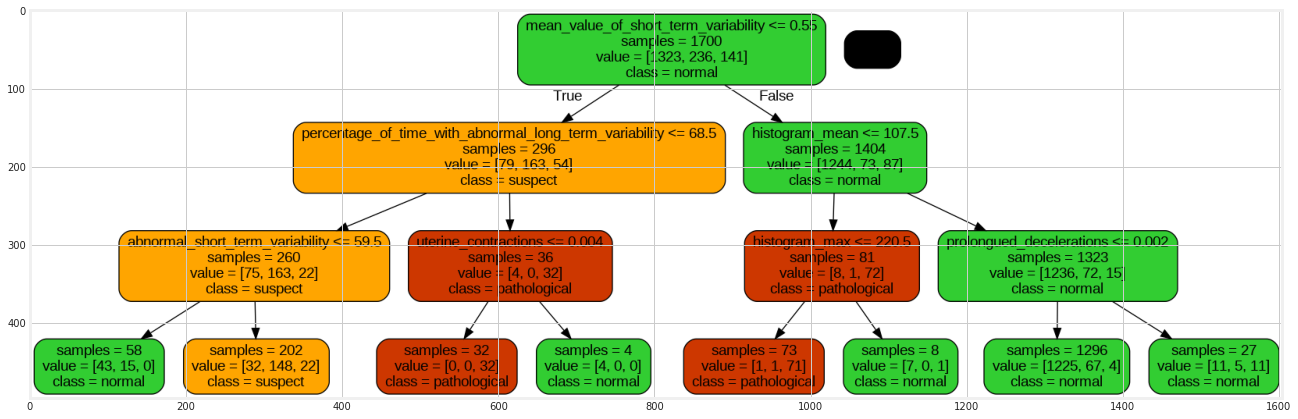

In [34]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
pprint(evaluate_metrics(y_test, y_pred))

plt.figure(figsize = (20, 20))
plt.imshow(create_tree_image(decision_tree))

In [35]:
from sklearn.metrics import classification_report

y_test_binary = (y_test > 1).astype(float)
y_pred = np.logical_or(
    X_test["mean_value_of_short_term_variability"] <= 0.55,
    X_test["histogram_mean"] <= 107.5
).astype(float)

print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       332
         1.0       0.74      0.79      0.76        94

    accuracy                           0.89       426
   macro avg       0.84      0.85      0.85       426
weighted avg       0.89      0.89      0.89       426



In [36]:
y_pred = decision_tree.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95      1323
         2.0       0.73      0.63      0.68       236
         3.0       0.98      0.73      0.84       141

    accuracy                           0.91      1700
   macro avg       0.88      0.78      0.82      1700
weighted avg       0.90      0.91      0.90      1700



{'accuracy': 0.8356807511737089,
 'f1_score': 0.7607992869482567,
 'precision': 0.732112090807743,
 'recall': 0.808142983556502}


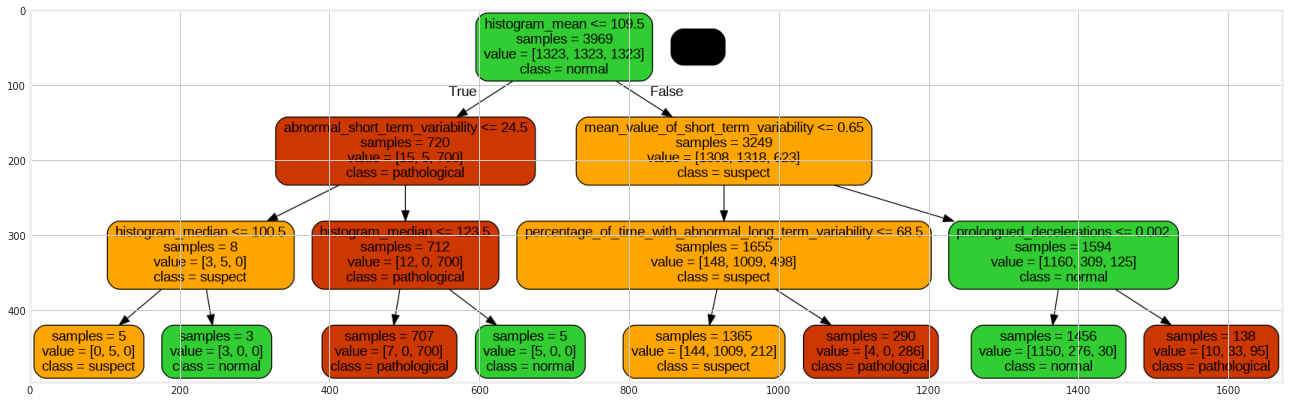

In [37]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=seed)

X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=seed)
decision_tree.fit(X_oversampled, y_oversampled)

plt.figure(figsize = (20, 20))
plt.imshow(create_tree_image(decision_tree))
y_pred = decision_tree.predict(X_test)

pprint(evaluate_metrics(y_test, y_pred))

In [38]:
y_pred = decision_tree.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.88      0.92      1323
         2.0       0.53      0.78      0.63       236
         3.0       0.82      0.82      0.82       141

    accuracy                           0.86      1700
   macro avg       0.77      0.83      0.79      1700
weighted avg       0.89      0.86      0.87      1700



In [39]:
y_test_binary = (y_test>1).astype(float)

y_pred = np.logical_or(
    X_test["histogram_mean"] <= 109.5,
    X_test["mean_value_of_short_term_variability"] <= 0.65
)
y_pred = y_pred.astype(float)

print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90       332
         1.0       0.62      0.83      0.71        94

    accuracy                           0.85       426
   macro avg       0.78      0.84      0.80       426
weighted avg       0.87      0.85      0.86       426



In [40]:
metrics = {}
for cls_name, cls_result in results.items():
    metrics[cls_name] = {
        "Train": np.mean(cls_result.cv_results_["mean_train_score"]),
        "Validation": np.mean(cls_result.cv_results_["mean_test_score"]),
        "Test": tests_metrics[cls_name]["f1_score"]
    }
pd.DataFrame.from_dict(metrics).T

,Train,Validation,Test
OneVsRest[LogisticRegression],0.799638,0.782495,0.775159
DecisionTreeClassifier,0.946172,0.833927,0.861336
RandomForestClassifier,0.950938,0.862044,0.902129
SVC,0.780742,0.733838,0.860832
KNeighborsClassifier,0.940115,0.812605,0.838374
